In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# warning Library
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cancer.csv")

In [3]:
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
data.drop(["Unnamed: 32", "id"], inplace = True, axis = 1)

In [5]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [6]:
data = data.rename(columns = {"diagnosis":"target" })

In [7]:
data

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        M        17.99         10.38          122.80     1001.0   
1        M        20.57         17.77          132.90     1326.0   
2        M        19.69         21.25          130.00     1203.0   
3        M        11.42         20.38           77.58      386.1   
4        M        20.29         14.34          135.10     1297.0   
..     ...          ...           ...             ...        ...   
564      M        21.56         22.39          142.00     1479.0   
565      M        20.13         28.25          131.20     1261.0   
566      M        16.60         28.08          108.30      858.1   
567      M        20.60         29.33          140.10     1265.0   
568      B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
5

In [8]:
#benign and malignant : iyi ve kötü huylu

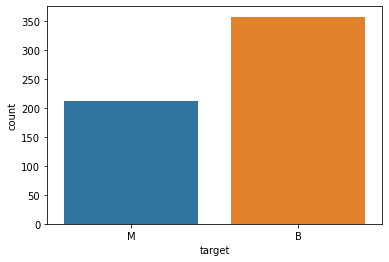

In [9]:
sns.countplot(data["target"]);

In [10]:
print(data.target.value_counts())

B    357
M    212
Name: target, dtype: int64


In [11]:
#targettaki benign ve malignant'ları görselleştirmenin dışında kalmaması için sayıya çevirmemiz gerekir

In [12]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target] #strip boşlukları siler.

In [13]:
data

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   
..      ...          ...           ...             ...        ...   
564       1        21.56         22.39          142.00     1479.0   
565       1        20.13         28.25          131.20     1261.0   
566       1        16.60         28.08          108.30      858.1   
567       1        20.60         29.33          140.10     1265.0   
568       0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                  

In [14]:
print(len(data))

569


In [15]:
data.head()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [16]:
data.shape

(569, 31)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [18]:
data.describe()

target  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [19]:
#veriler arasında çok fark var standardization yapmalıyız.

In [20]:
data

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   
..      ...          ...           ...             ...        ...   
564       1        21.56         22.39          142.00     1479.0   
565       1        20.13         28.25          131.20     1261.0   
566       1        16.60         28.08          108.30      858.1   
567       1        20.60         29.33          140.10     1265.0   
568       0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                  

In [21]:
"""
standardization
missing value
"""

'\nstandardization\nmissing value\n'

In [22]:
# %% EDA

In [23]:
#Correlation
corr_matrix = data.corr()

In [24]:
corr_matrix

target  radius_mean  texture_mean  perimeter_mean  \
target                   1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                0.567134     0.679090      0.275869        0.691765   
texture_se              -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se             0.556141     0.674172      0.281673        0.693135   
area_se                  0.548236     0.735864      0.259845        0.744983   
smoothness_se           -0.067016    -0.222600      0.006614       -0.202694   
compactness_se           0.292999     0.206000      0.191975        0.250744   
concavity_se             0.253730     0.194204      0.143293        0.228082   
concave points_se        0.408042     0.376169      0.163851        0.407217   
symmetry_se             -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.077972    -0.042641      0.054458       -0.005523   
radius_worst             0.776454     0.969539      0.352573        0.969476   
texture_worst            0.456903     0.297008      0.912045        0.303038   
perimeter_worst          0.782914     0.965137      0.358040        0.970387   
area_worst               0.733825     0.941082      0.343546        0.941550   
smoothness_worst         0.421465     0.119616      0.077503        0.150549   
compactness_worst        0.590998     0.413463      0.277830        0.455774   
concavity_worst          0.659610     0.526911      0.301025        0.563879   
concave points_worst     0.793566     0.744214      0.295316        0.771241   
symmetry_worst           0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst  0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
target                    0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmet

Text(0.5, 1.0, 'Correlation Between Features')

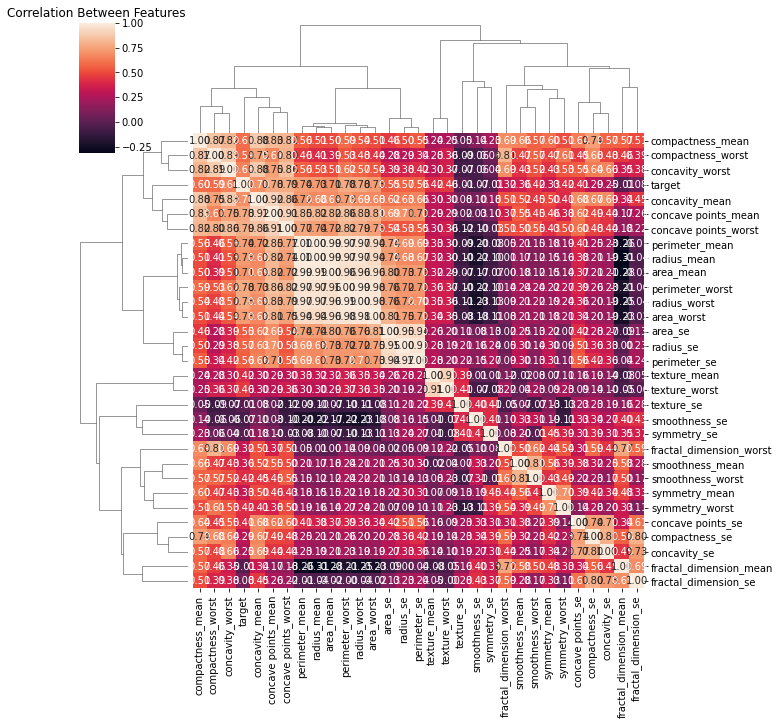

In [25]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f") #Annot: sayıların gözükmesini sağlar
plt.title("Correlation Between Features")


In [26]:
threshold = 0.5

In [27]:
filtre = np.abs(corr_matrix["target"]) > threshold

In [28]:
corr_features = corr_matrix.columns[filtre].tolist()

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

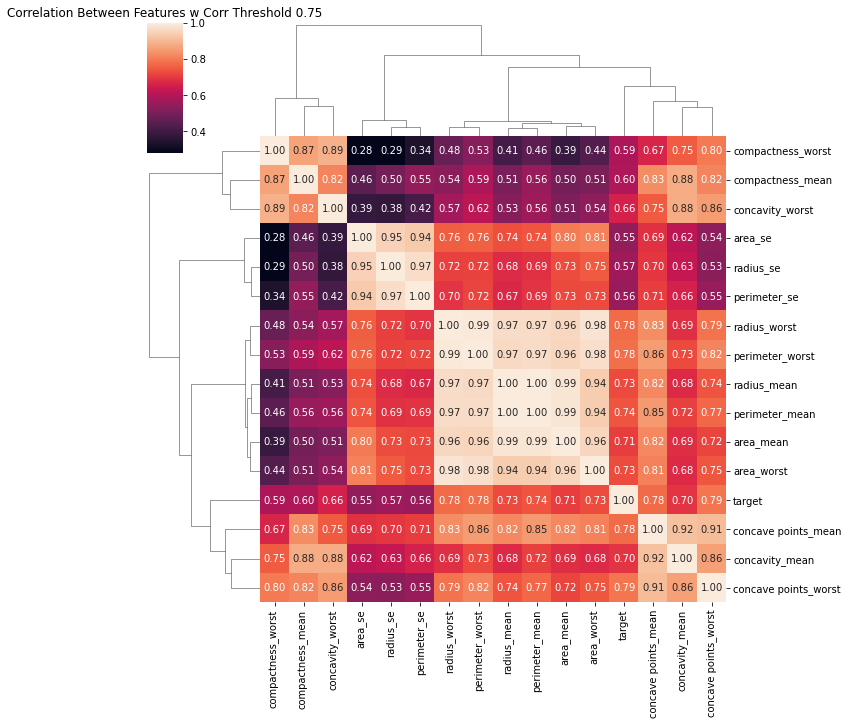

In [29]:
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75")

In [30]:
# three some correlated features

In [31]:
#boxplot

In [32]:
data_melted = pd.melt(data, id_vars = 'target',
                      var_name = 'features',
                      value_name = "value")

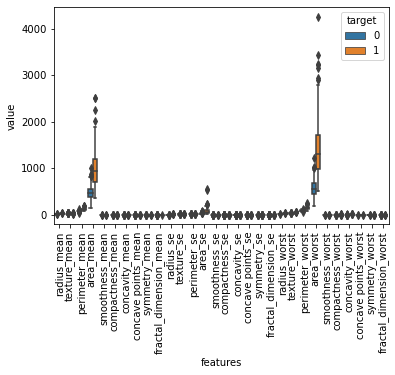

In [33]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [34]:
#pair plot

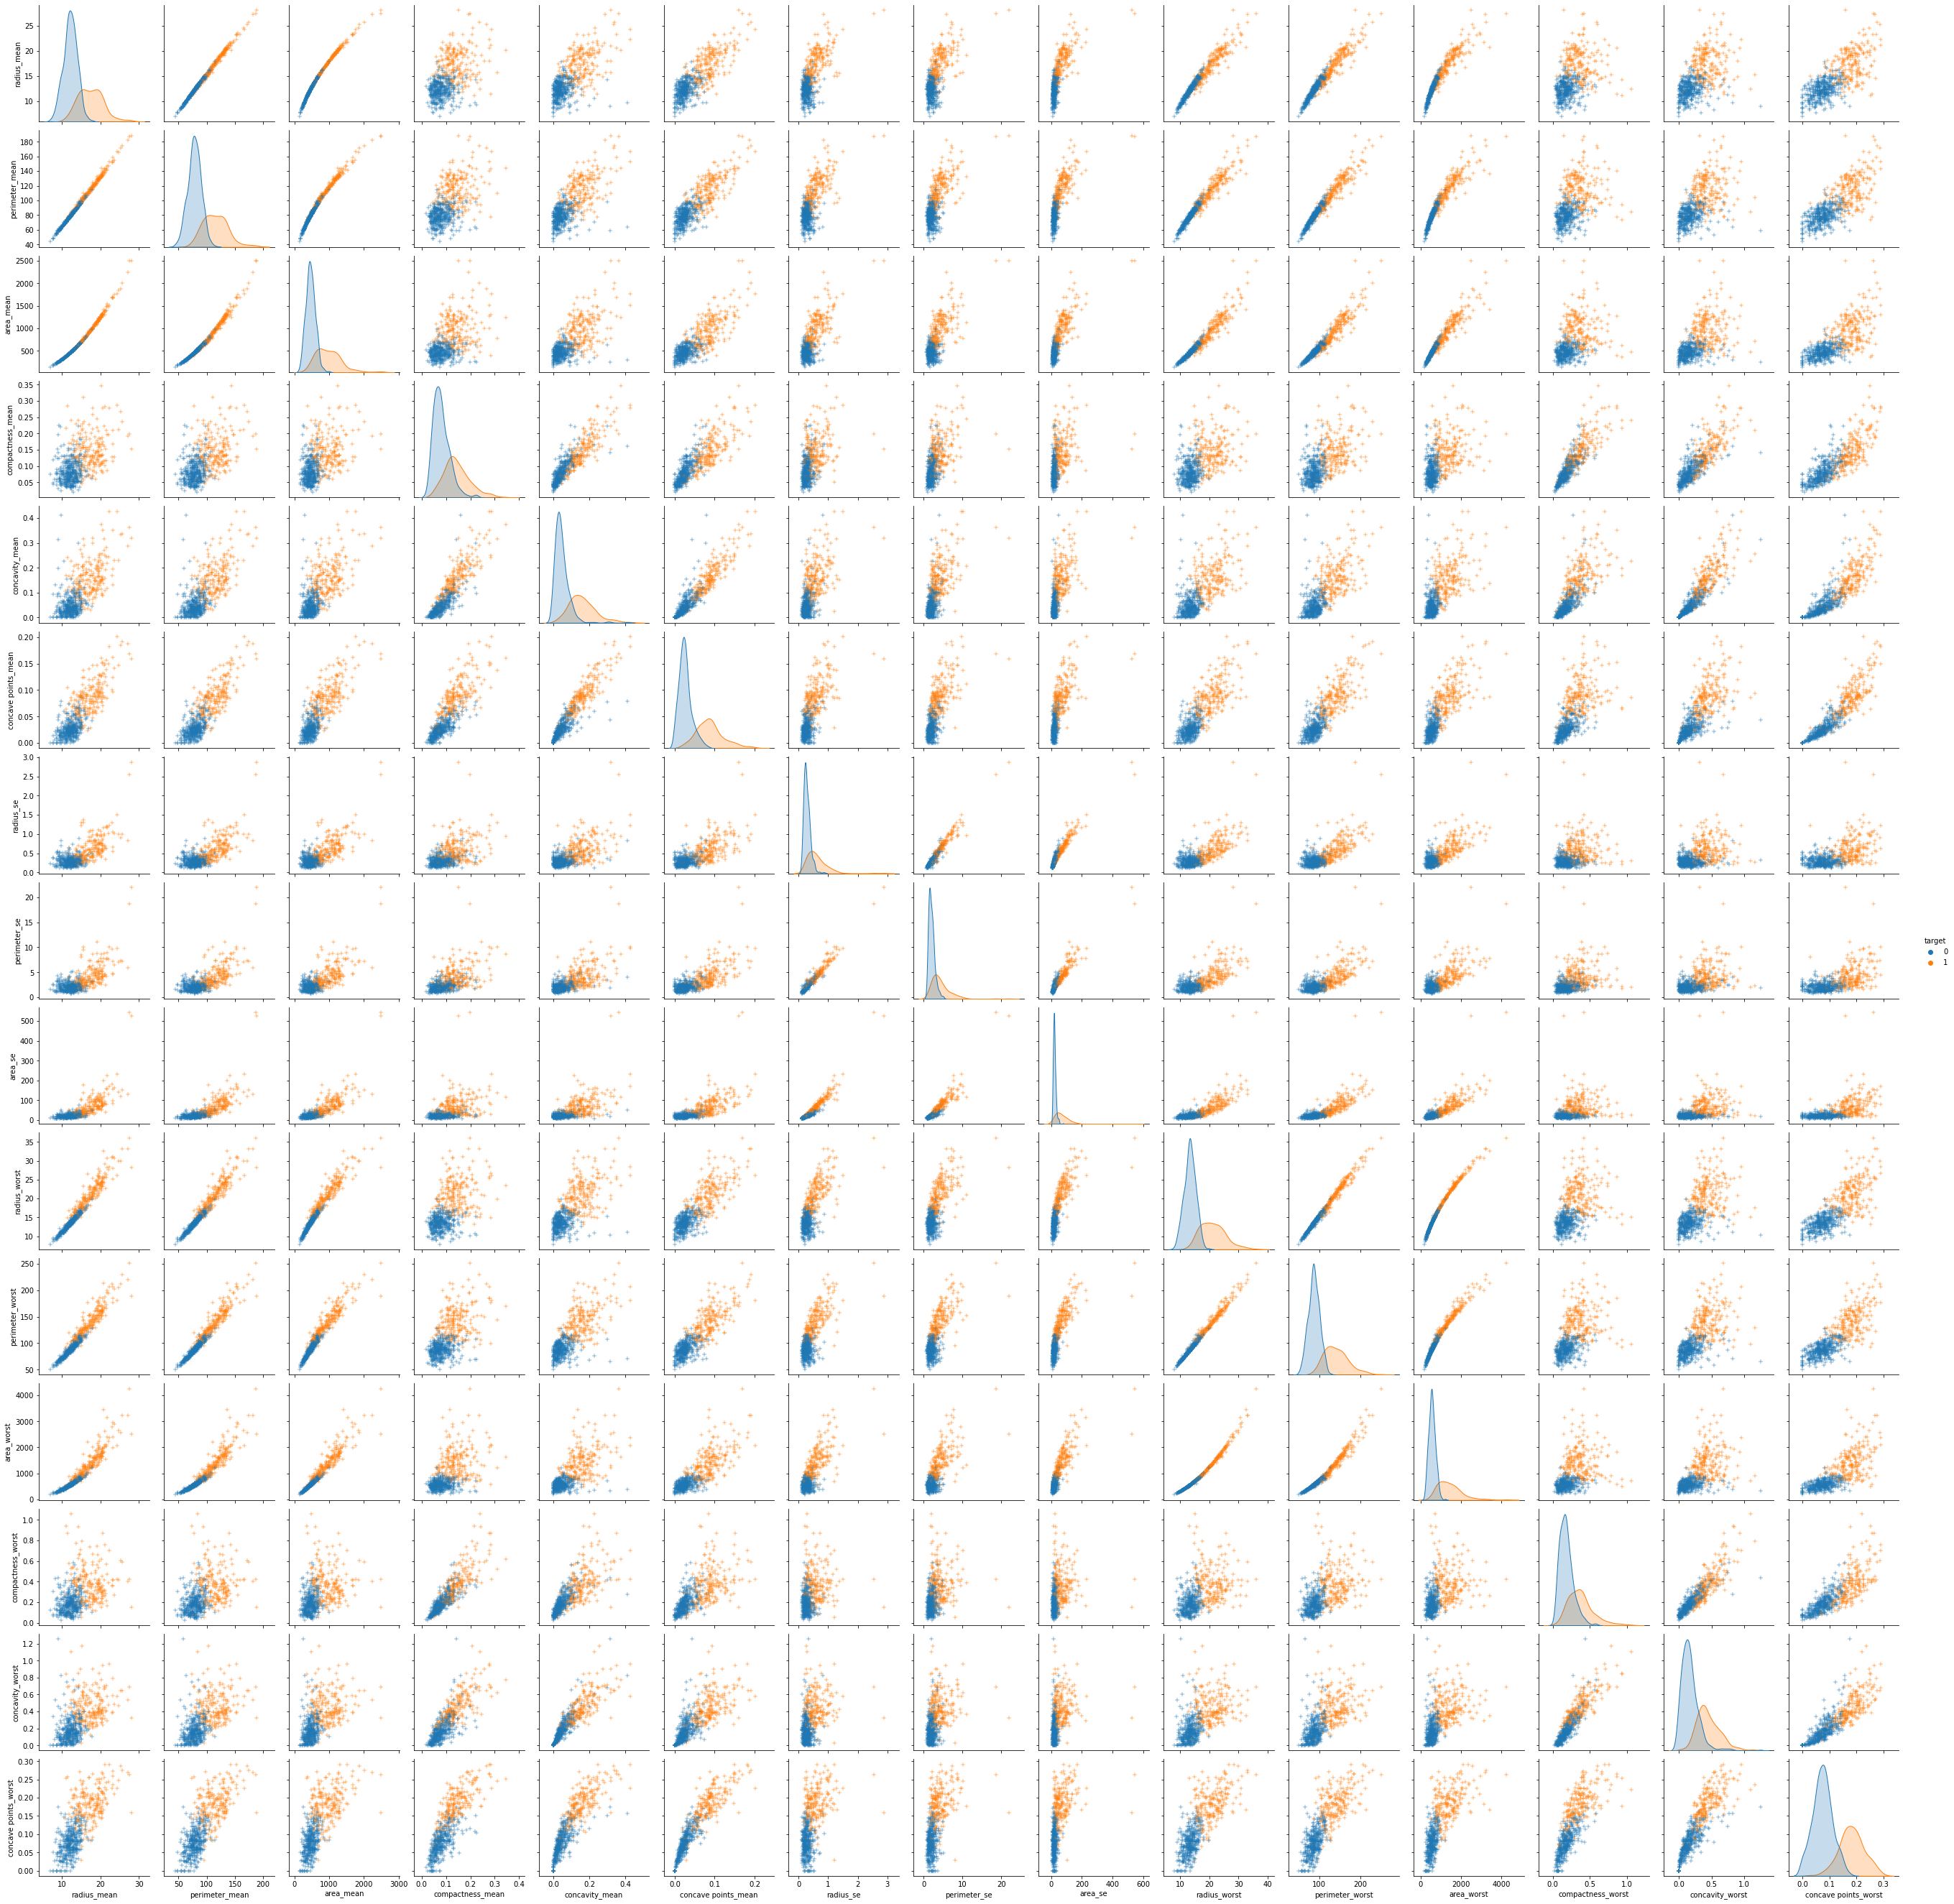

In [35]:
sns.pairplot(data[corr_features],diag_kind = "kde", markers = "+", hue = "target")
plt.show()

In [36]:
#bu grafiklerde skewness'lık söz konusudur

## outlier

In [35]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [37]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [38]:
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [39]:
clf = LocalOutlierFactor()

In [40]:
y_pred = clf.fit_predict(x)

In [41]:
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [42]:
X_score = clf.negative_outlier_factor_

In [43]:
X_score

array([-1.42244008, -1.06678249, -0.97894764, -1.59693295, -1.06993589,
       -1.773071  , -1.01568723, -1.25174625, -1.38051485, -1.64435685,
       -0.99760184, -1.06178607, -1.12949091, -1.25844429, -0.96863713,
       -1.09335084, -1.13938097, -1.06049329, -1.41067136, -0.97224755,
       -0.98172267, -1.01796076, -1.00120872, -1.55647306, -1.76479918,
       -1.14444971, -1.18253923, -1.05669361, -1.1171278 , -0.96612603,
       -0.98190689, -1.99760079, -1.00701649, -1.00581116, -1.01466535,
       -0.98769018, -0.98362673, -1.39411328, -2.2334333 , -1.09045555,
       -1.14776543, -1.31502499, -0.98035055, -1.4174209 , -1.28342864,
       -0.98156833, -1.32235455, -1.32568003, -1.09322188, -0.97065701,
       -0.97278561, -1.05918996, -0.97370459, -1.02944   , -1.03748568,
       -1.00072293, -1.24017071, -1.05450437, -0.99159205, -1.09401411,
       -0.98594633, -1.09659782, -1.08187925, -1.00799336, -1.59848383,
       -1.05245105, -1.02666387, -0.97040029, -1.01252311, -1.06

In [44]:
outlier_score = pd.DataFrame()

In [45]:
outlier_score["score"] = X_score

In [46]:
X_score

array([-1.42244008, -1.06678249, -0.97894764, -1.59693295, -1.06993589,
       -1.773071  , -1.01568723, -1.25174625, -1.38051485, -1.64435685,
       -0.99760184, -1.06178607, -1.12949091, -1.25844429, -0.96863713,
       -1.09335084, -1.13938097, -1.06049329, -1.41067136, -0.97224755,
       -0.98172267, -1.01796076, -1.00120872, -1.55647306, -1.76479918,
       -1.14444971, -1.18253923, -1.05669361, -1.1171278 , -0.96612603,
       -0.98190689, -1.99760079, -1.00701649, -1.00581116, -1.01466535,
       -0.98769018, -0.98362673, -1.39411328, -2.2334333 , -1.09045555,
       -1.14776543, -1.31502499, -0.98035055, -1.4174209 , -1.28342864,
       -0.98156833, -1.32235455, -1.32568003, -1.09322188, -0.97065701,
       -0.97278561, -1.05918996, -0.97370459, -1.02944   , -1.03748568,
       -1.00072293, -1.24017071, -1.05450437, -0.99159205, -1.09401411,
       -0.98594633, -1.09659782, -1.08187925, -1.00799336, -1.59848383,
       -1.05245105, -1.02666387, -0.97040029, -1.01252311, -1.06

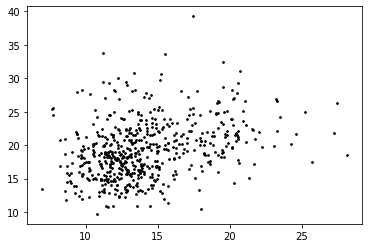

In [47]:
#plt.scatter
plt.figure()
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

In [48]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())

In [49]:
radius

array([2.17678617e-01, 5.51586771e-02, 1.50219965e-02, 2.97414217e-01,
       5.65996402e-02, 3.77901591e-01, 3.18103796e-02, 1.39679012e-01,
       1.98520624e-01, 3.19084860e-01, 2.35461498e-02, 5.28755299e-02,
       8.38136774e-02, 1.42739724e-01, 1.03105448e-02, 6.72992490e-02,
       8.83330018e-02, 5.22847898e-02, 2.12300829e-01, 1.19603479e-02,
       1.62900649e-02, 3.28492841e-02, 2.51943345e-02, 2.78925821e-01,
       3.74121732e-01, 9.06491936e-02, 1.08054436e-01, 5.05485014e-02,
       7.81642778e-02, 9.16308358e-03, 1.63742430e-02, 4.80501870e-01,
       2.78482337e-02, 2.72974494e-02, 3.13434246e-02, 1.90169546e-02,
       1.71601360e-02, 2.04734512e-01, 5.88266998e-01, 6.59762289e-02,
       9.21643344e-02, 1.68594628e-01, 1.56630642e-02, 2.15385074e-01,
       1.54156480e-01, 1.62195395e-02, 1.71943912e-01, 1.73463515e-01,
       6.72403195e-02, 1.12335429e-02, 1.22062211e-02, 5.16892213e-02,
       1.26261539e-02, 3.80947925e-02, 4.17713173e-02, 2.49723489e-02,
      

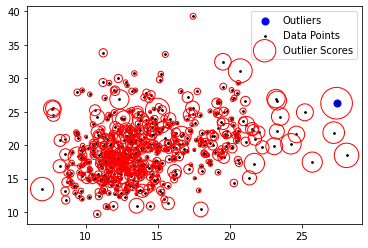

In [50]:
#threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "blue", s = 50, label = "Outliers") 



plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [51]:
#drop outlier

In [52]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values


In [53]:
#veri setinin eğitim ve test seti olarak ayrılması

## Train-test split

In [54]:
test_size = 0.3

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

## Standardization

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
X_train_df = pd.DataFrame(X_train, columns = columns)

In [60]:
X_train_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.126206     -0.106331       -0.139113  -0.243152         0.200584   
1       1.110155      0.350378        1.085508   0.972350         0.516224   
2      -1.565931     -0.763715       -1.524658  -1.225782         1.326652   
3       0.567081     -0.251647        0.550500   0.456043         0.061958   
4      -0.487293      0.172769       -0.488764  -0.531209        -0.840888   
..           ...           ...             ...        ...              ...   
392    -1.519135     -1.038202       -1.400385  -1.187933         0.106034   
393    -0.724166     -0.187062       -0.710351  -0.701096         1.269780   
394     0.041338     -0.535360       -0.072975  -0.065175        -2.278331   
395    -0.048211      0.110491       -0.038431  -0.160809         0.686840   
396    -0.568176      0.318086       -0.623991  -0.567614        -1.152263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.082163       -0.426589            -0.287204      -0.345793   
1            0.541814        0.433900             1.051074       0.668203   
2           -0.408721       -0.589335            -0.780730      -0.582878   
3            0.213772        0.101004             0.286230       0.190385   
4           -0.027839       -0.238905            -0.468792      -0.101412   
..                ...             ...                  ...            ...   
392          0.987715       -0.008229            -0.529056       0.339931   
393         -0.021946       -0.207733            -0.366317      -0.028463   
394         -1.494204       -1.031853            -1.125587      -1.097171   
395          0.205915        0.336486             0.424279      -0.509929   
396         -1.226467       -0.816504            -0.821613      -0.254606   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.802295  ...     -0.243869       0.026662   
1                 -0.276397  ...      1.026425      -0.008771   
2                  1.903286  ...     -1.410326      -0.941303   
3                 -0.026932  ...      0.779600      -0.031319   
4                 -0.025539  ...     -0.594955      -0.385649   
..                      ...  ...           ...            ...   
392                3.780546  ...     -1.387984      -1.577487   
393                0.352143  ...     -0.663044       0.611307   
394               -1.242204  ...     -0.286425      -0.775413   
395                0.385591  ...      0.166796       0.859338   
396               -0.822712  ...     -0.620489       1.187898   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -0.235439   -0.316803          0.456859           0.060010   
1           0.960829    0.869669          0.705777           0.841678   
2          -1.316628   -1.082299          1.762589          -0.075060   
3           0.679317    0.656981         -0.027877          -0.160648   
4          -0.585008   -0.592932         -1.180763          -0.212804   
..               ...         ...               ...                ...   
392        -1.376024   -1.082299         -0.495145          -0.026916   
393        -0.666059   -0.647204          1.605378           0.122865   
394        -0.389807   -0.348523         -2.024903          -1.319041   
395         0.212194   -0.009871          1.277853           0.730011   
396        -0.694829   -0.599349         -0.861973          -1.063210   

     concavity_worst  concave points_worst  symmetry_worst  \
0          -0.359469              0.218125       -0.054096   
1           0.340937              1.293014        0.281891   
2          -0.092330             -0.146403        0.068515   
3           0.085079              0.112194       -0.144860   
4          -0.375364             -0.594274       -0.315243   
..               ...                   ...             ...   
392        -0.616353             -1.036536       -1

In [61]:
X_train_df_describe = X_train_df.describe()

In [62]:
X_train_df_describe

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  3.970000e+02  3.970000e+02    3.970000e+02  3.970000e+02   
mean   1.789780e-17 -2.863648e-16   -7.243017e-17 -2.245615e-16   
std    1.001262e+00  1.001262e+00    1.001262e+00  1.001262e+00   
min   -1.712388e+00 -2.175361e+00   -1.632924e+00 -1.303791e+00   
25%   -7.039450e-01 -7.291157e-01   -7.065592e-01 -6.765379e-01   
50%   -2.446426e-01 -1.109439e-01   -2.549616e-01 -2.989145e-01   
75%    4.919745e-01  5.648931e-01    5.336490e-01  3.852569e-01   
max    4.033514e+00  4.645288e+00    4.063861e+00  5.327298e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     3.970000e+02      3.970000e+02    3.970000e+02         3.970000e+02   
mean     -2.125364e-17     -2.377052e-16    2.768566e-17         1.138188e-16   
std       1.001262e+00      1.001262e+00    1.001262e+00         1.001262e+00   
min      -2.404872e+00     -1.638974e+00   -1.126020e+00        -1.291511e+00   
25%      -7.086599e-01     -7.677983e-01   -7.505222e-01        -7.462174e-01   
50%      -9.870612e-02     -2.500035e-01   -3.559314e-01        -3.888829e-01   
75%       6.086412e-01      5.418139e-01    4.663710e-01         6.740944e-01   
max       4.767417e+00      4.097233e+00    4.417475e+00         4.049923e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   3.970000e+02            3.970000e+02  ...  3.970000e+02   
mean   -1.639187e-15            6.843113e-16  ...  1.216491e-16   
std     1.001262e+00            1.001262e+00  ...  1.001262e+00   
min    -2.340956e+00           -1.731378e+00  ... -1.554165e+00   
25%    -6.923019e-01           -7.154003e-01  ... -6.821946e-01   
50%    -3.575803e-02           -1.774476e-01  ... -2.715302e-01   
75%     5.587789e-01            4.845408e-01  ...  4.880926e-01   
max     4.490747e+00            4.845302e+00  ...  3.590418e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   3.970000e+02     3.970000e+02  3.970000e+02      3.970000e+02   
mean   -4.810034e-16    -4.438096e-16 -9.620069e-17      7.100394e-16   
std     1.001262e+00     1.001262e+00  1.001262e+00      1.001262e+00   
min    -2.165353e+00    -1.558852e+00 -1.163524e+00     -2.217924e+00   
25%    -7.528643e-01    -7.019438e-01 -6.578384e-01     -7.527979e-01   
50%    -5.708877e-02    -2.809144e-01 -3.430225e-01     -4.097822e-02   
75%     6.757303e-01     5.339215e-01  2.884427e-01      6.097035e-01   
max     3.877586e+00     3.782128e+00  4.325859e+00      3.771406e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       3.970000e+02     3.970000e+02          3.970000e+02   
mean       -1.185729e-16     7.187086e-17         -6.795572e-17   
std         1.001262e+00     1.001262e+00          1.001262e+00   
min        -1.426295e+00    -1.351626e+00         -1.782104e+00   
25%        -6.715073e-01    -7.547935e-01         -7.847938e-01   
50%        -2.830139e-01    -2.487165e-01         -2.253839e-01   
75%         5.982844e-01     5.947450e-01          7.322025e-01   
max         4.615614e+00     3.461489e+00          2.511223e+00   

       symmetry_worst  fractal_dimension_worst  
count    3.970000e+02             3.970000e+02  
mean    -6.739641e-17             3.383803e-17  
std      1.001262e+00             1.001262e+00  
min     -2.098683e+00            -1.623010e+00  
25%     -6.687460e-01            -6.938485e-01  
50%     -1.273445e-01            -2.398587e-01  
75%      4.793437e-01             4.494271e-01  
max      5.979346e+00             5.130159e+00  

[8 rows x 30 columns]

In [63]:
X_train_df["target"] = Y_train

In [64]:
#box plot
data_melted = pd.melt(X_train_df, id_vars = 'target',
                      var_name = 'features',
                      value_name = "value")

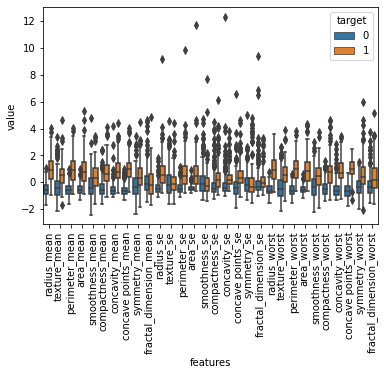

In [65]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

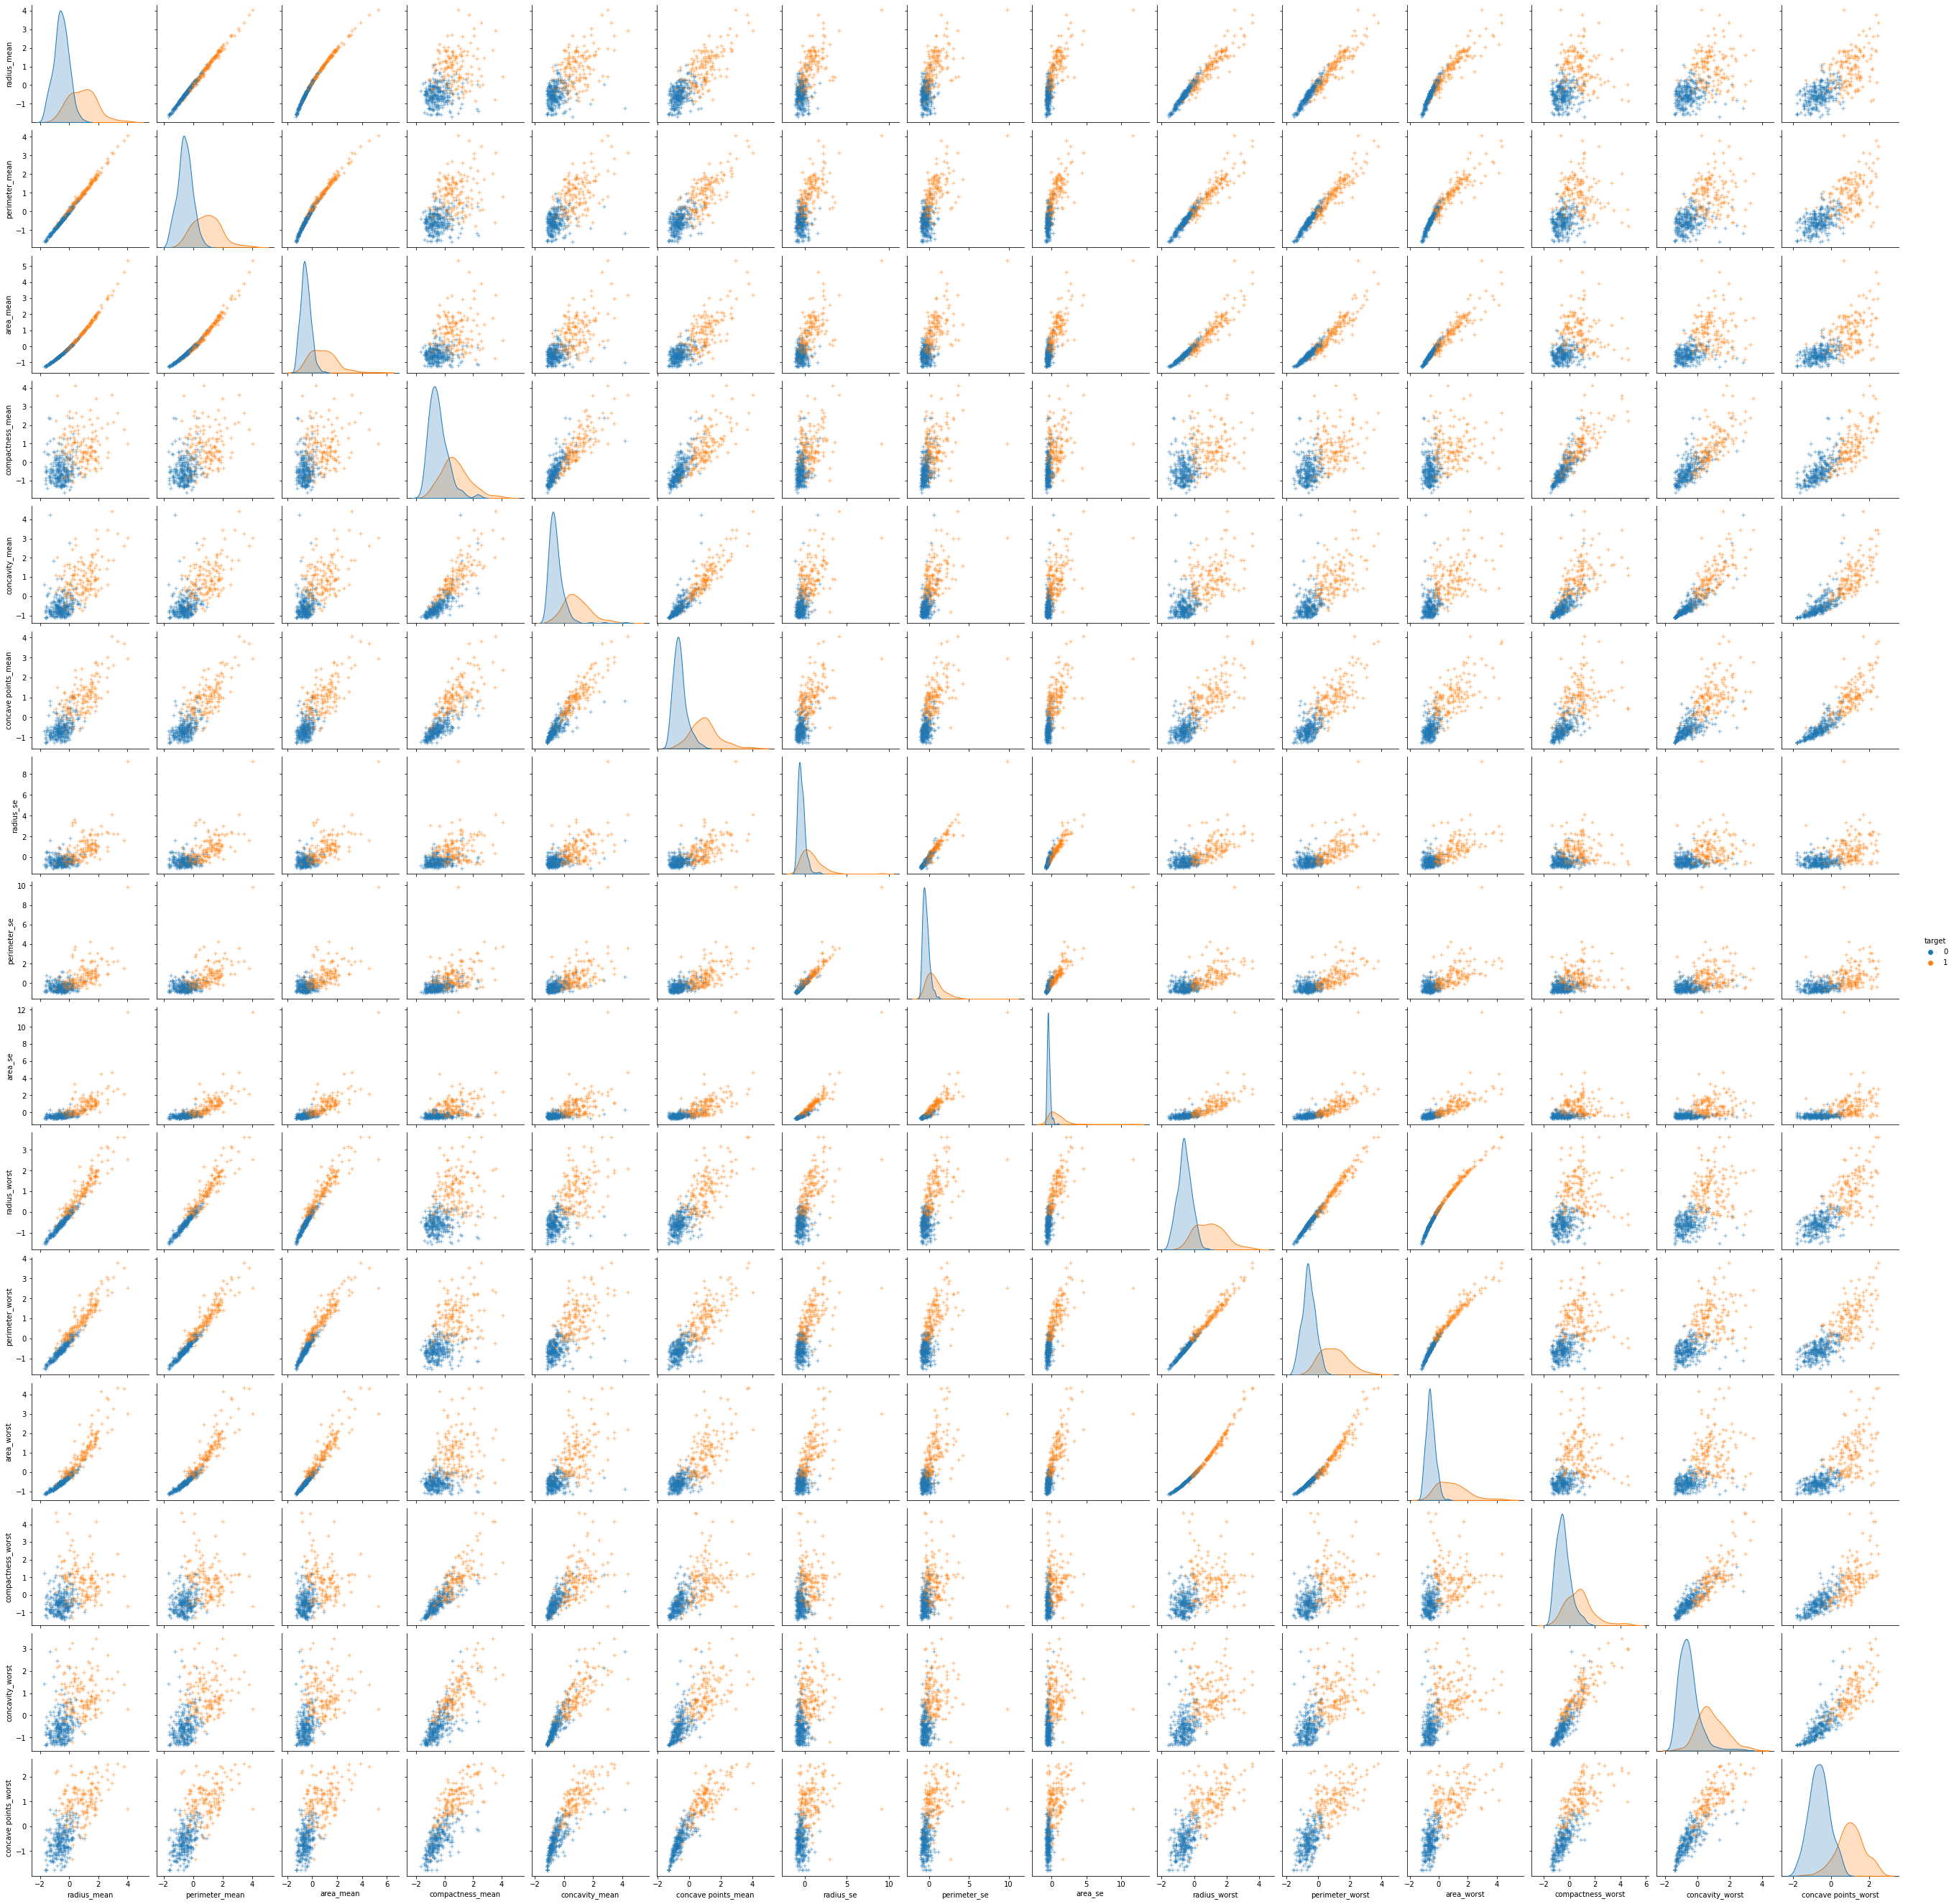

In [69]:
#pair plot
sns.pairplot(X_train_df[corr_features],diag_kind = "kde", markers = "+", hue = "target")
plt.show()

## Basic KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [67]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [68]:
y_pred = knn.predict(X_test)

In [69]:
cm = confusion_matrix(Y_test, y_pred)

In [70]:
acc = accuracy_score(Y_test, y_pred)

In [71]:
score = knn.score(X_test, Y_test)

In [72]:
print("score:", score)
print("CM:", cm)
print("Basic KNN Acc:", acc)

score: 0.9532163742690059
CM: [[108   1]
 [  7  55]]
Basic KNN Acc: 0.9532163742690059


## KNN En İyi Parametreleri Bulma

In [73]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform", "distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

In [74]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


## PCA

In [75]:
#PCA'e başlamadan önce verimizi scale(standardize) etmemiz gerekiyor.

In [76]:
scaler = StandardScaler()

In [77]:
x_scaled = scaler.fit_transform(x)

In [78]:
pca = PCA(n_components = 2)

In [79]:
pca.fit(x_scaled)

PCA(n_components=2)

In [80]:
X_reduced_pca = pca.transform(x_scaled)

In [81]:
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1", "p2"])

In [82]:
pca_data["target"] = y

Text(0.5, 1.0, 'PCA: p1 vs p2')

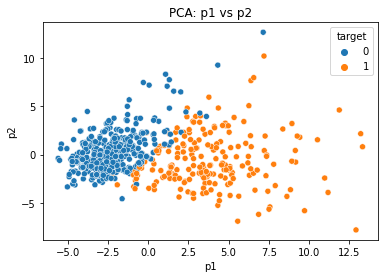

In [83]:
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")

In [84]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca,y, test_size = test_size, random_state = 42)

In [85]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


In [86]:
#visualize

In [87]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

In [88]:
h = .05 #step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [89]:
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

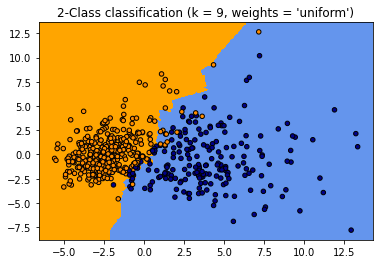

In [90]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
         % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

## NCA

In [103]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)

In [104]:
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)

In [105]:
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])

In [106]:
nca_data["target"] = y

Text(0.5, 1.0, 'NCA: p1 vs p2')

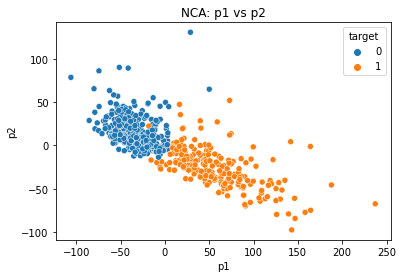

In [108]:
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

In [109]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca,y, test_size = test_size, random_state = 42)


In [110]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


In [111]:
#visualize

In [112]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

In [113]:
h = .2 #step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [114]:
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

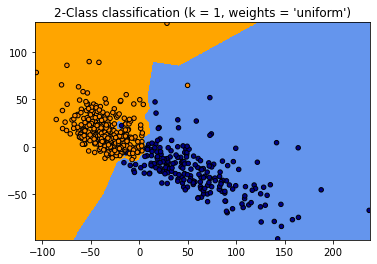

In [115]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
         % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))